In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. Load & parse
df = pd.read_csv('Real_Estate_Sales_2001_to_2023.csv')
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')  # parse dates

C:\Users\DELL\AppData\Local\Temp\ipykernel_6176\2633508556.py:2: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Real_Estate_Sales_2001_to_2023.csv')


In [7]:
# 2. Basic info & missing values
print(df.info())
#print(df.describe(include='all'))
print("--------------------------------")
print("Dataframe shape:", df.shape)
print("--------------------------------")

print('Missing values per column:\n', df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1141722 non-null  int64         
 1   List Year         1141722 non-null  int64         
 2   Date Recorded     1141471 non-null  datetime64[ns]
 3   Town              1141722 non-null  object        
 4   Address           1141671 non-null  object        
 5   Assessed Value    1141722 non-null  float64       
 6   Sale Amount       1141722 non-null  float64       
 7   Sales Ratio       1141722 non-null  object        
 8   Property Type     759276 non-null   object        
 9   Residential Type  738804 non-null   object        
 10  Non Use Code      324807 non-null   object        
 11  Assessor Remarks  181090 non-null   object        
 12  OPM remarks       14346 non-null    object        
 13  Location          341241 non-null   object

In [8]:
# 3. Univariate statistics on sale price
prices = df['Sale Amount'].dropna()
print(f"Mean Sale Price: {prices.mean():.0f}")
print(f"Std Dev Sale Price: {prices.std():.0f}")
print("25/50/75th percentiles:", np.percentile(prices, [25, 50, 75]))

Mean Sale Price: 410451
Std Dev Sale Price: 5048996
25/50/75th percentiles: [146100. 237500. 383750.]


In [10]:
# First, convert the string columns to numeric by removing commas
df['Assessed Value'] = pd.to_numeric(df['Assessed Value'].astype(str).str.replace(',', ''), errors='coerce')
df['Sale Amount'] = pd.to_numeric(df['Sale Amount'].astype(str).str.replace(',', ''), errors='coerce')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'].astype(str).str.replace(',', ''), errors='coerce')

# Now you can calculate the correlation matrix
num = df[['Assessed Value', 'Sale Amount', 'Sales Ratio']].dropna()
print("Correlation matrix:\n", num.corr())

Correlation matrix:
                 Assessed Value  Sale Amount  Sales Ratio
Assessed Value        1.000000     0.128392     0.003930
Sale Amount           0.128392     1.000000    -0.000395
Sales Ratio           0.003930    -0.000395     1.000000


In [11]:
# 5. Year‐based analysis
#   a) Avg sale price by listing year
print("Avg Sale Price by List Year:\n", df.groupby('List Year')['Sale Amount'].mean())
print("--------------------------------")
#   b) Most & least expensive sales
print("Max Sale Record:\n", df.loc[df['Sale Amount'].idxmax()])
print("--------------------------------")
print("Min Sale Record:\n", df.loc[df['Sale Amount'].idxmin()])


Avg Sale Price by List Year:
 List Year
2001    246235.035160
2002    296357.123706
2003    327217.932922
2004    380297.014169
2005    364030.126084
2006    475379.225385
2007    435713.379734
2008    325831.792393
2009    355250.327162
2010    331657.472575
2011    391684.320747
2012    395477.676013
2013    413516.239641
2014    401421.941220
2015    345883.763949
2016    507761.249272
2017    393251.314693
2018    383727.664935
2019    420296.971308
2020    604963.871051
2021    536975.197072
2022    557749.715937
2023    538314.328200
Name: Sale Amount, dtype: float64
--------------------------------
Max Sale Record:
 Serial Number                    20200091
List Year                            2020
Date Recorded         2021-08-19 00:00:00
Town                           Willington
Address                  456 TOLLAND TPKE
Assessed Value                  2238530.0
Sale Amount                  5000000000.0
Sales Ratio                      0.000448
Property Type                  Ap

In [12]:
# 6. New feature: price vs. assessed value
df['Price_per_Assessed'] = df['Sale Amount'] / df['Assessed Value']
print(df[['Town','Sale Amount','Assessed Value','Price_per_Assessed']].head())

      Town  Sale Amount  Assessed Value  Price_per_Assessed
0  Ansonia     248400.0        133000.0            1.867669
1  Ansonia     239900.0        110500.0            2.171041
2  Ansonia     325000.0        150500.0            2.159468
3  Ansonia     202500.0        127400.0            1.589482
4     Avon     362500.0        179990.0            2.014001


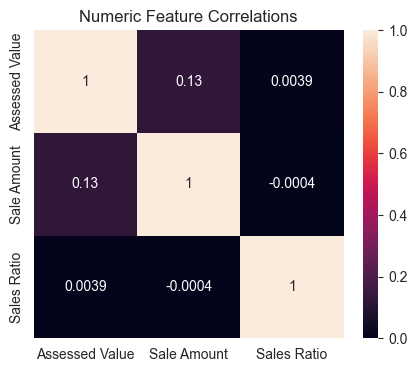

In [17]:
# 7d. Heatmap of correlations
plt.figure(figsize=(5,4))
sns.heatmap(num.corr(), annot=True)
plt.title('Numeric Feature Correlations')
plt.show()

In [ ]:
# 8. Next steps suggestions:
#    • Drop or impute missing Town/Residential Type
#    • Convert 'List Year' and 'Date Recorded' into age features
#    • Identify outliers (IQR or z‐score) in price and ratio
#    • Build a regression model (e.g., RandomForest) to predict Sale Amount
